In [1]:
import numpy as np
from optimize.util import optimize
import regression as reg
from matplotlib import pyplot as plt
import tests as tests
import util

In [2]:
test = tests.create_test(func=lambda x: np.exp(0.3 * x),
                           model_name='lin',
                           point=np.array([10000., 1000., 1000., 10000., -1000.]),
                           params=2,
                           begin=-10,
                           end=10,
                           steps=1000
                           )

In [3]:
print("model =", test.model)
print("start = ", test.init_point)
print("function = ", test.func)

model = (<function lin_test at 0x0000013A86A8C280>, <function lin_jac at 0x0000013A86A8C310>)
start =  [10000.  1000.]
function =  <function <lambda> at 0x0000013AE62CC820>


In [4]:
func, jac = test.model
gn =  optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='GAUSS-NEWTON')
pdl = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='POWELL-DOG-LEG')
bfgs = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='BFGS')
lbfgs = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='L-BFGS')
sgd = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='SGD')
mnt = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='MOMENTUM')
nst = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='NESTEROV')
agd = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='ADA-GRAD')
rms = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='RMS-PROP')
adam = optimize(func, jac, reg.regression, reg.grad, reg.hessian, method='ADAM')

eps = 1e-8
max_iters = 2000
learning_rate = 0.01
batch_size = 1

res = {
    'GAUSS-NEWTON': gn(test.X, test.Y, test.init_point, eps, max_iters),
    'POWELL-DOG-LEG': pdl(test.X, test.Y, test.init_point, 1000, eps, max_iters),
    'BFGS': bfgs(test.X, test.Y, test.init_point, eps, max_iters),
    'L-BFGS': lbfgs(test.X, test.Y, test.init_point, 0.5, 100, eps, max_iters),
    'SGD': sgd(test.X, test.Y, test.init_point, eps, learning_rate, batch_size, max_iters),
    'MOMENTUM': mnt(test.X, test.Y, test.init_point, 0.01, eps, learning_rate, batch_size, max_iters),
    'NESTEROV': nst(test.X, test.Y, test.init_point, 0.01, eps, learning_rate, batch_size, max_iters)
}

# agdr, agdi = agd(test.X, test.Y, test.init_point, eps, learning_rate, batch_size, max_iters)
# rmsr, rmsi = rms(test.X, test.Y, test.init_point, 0.01, eps, learning_rate, batch_size, max_iters)
# adamr, adami = adam(test.X, test.Y, test.init_point, 0.9, 0.99, eps, learning_rate, batch_size, max_iters)

(26432, 58936)
Filename: C:\Workspace\study\sem-4\metopts-labs\lab_3\solution\optimize\gauss_newton.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    12 123.6641 MiB 123.6641 MiB           1   @profile(precision=4)
    13                                         def gauss_newton(func, jacobian, start, eps, max_iter):
    14 123.6641 MiB   0.0000 MiB           1       trace = [start]
    15                                         
    16 123.6641 MiB   0.0000 MiB           1       actions = 0
    17 123.6641 MiB   0.0000 MiB           1       iter = 0
    18                                         
    19 123.6641 MiB   0.0000 MiB           1       tracemalloc.start()
    20 123.6641 MiB   0.0000 MiB           1       start_time = time.time()
    21                                         
    22 123.6641 MiB   0.0000 MiB           1       param = np.array(start)
    23 123.9141 MiB   0.0000 MiB           2       for i in range(max_iter):
    24 123.9141 MiB   0.0000 

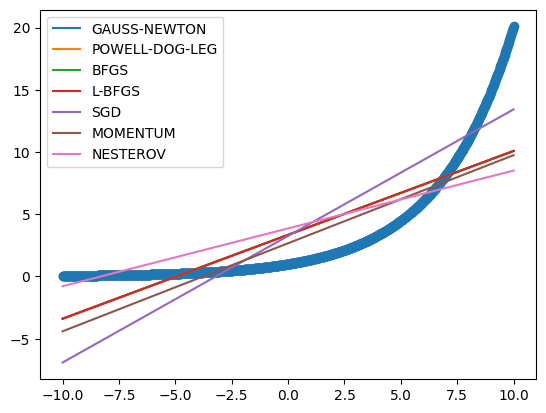

In [5]:
X = np.linspace(test.begin, test.end, test.steps)
plt.scatter(test.X, test.Y)
for name in res:
    Y = func(X)(res[name][0])
    plt.plot(X, Y, label=name)
plt.legend()

In [6]:
for name in res:
    point, info = res[name]
    print("Method:", name, end='\t')
    print("Point:", point, end='\t')
    print("Error:", sum((test.Y - test.model[0](test.X)(point)) ** 2), end='\t')
    
    from tests import ProcInfo
    print("T:", info.time, end='\t')
    print("M:", info.memory, end='\t')
    print("I:", info.iterations)

Method: GAUSS-NEWTON	Point: [0.67382459 3.34603004]	Error: 7426.4909844954245	T: 0.002004384994506836	M: (26432, 58936)	I: 2
Method: POWELL-DOG-LEG	Point: [0.67382459 3.34603004]	Error: 7426.490984495425	T: 0.01203155517578125	M: (4904, 53392)	I: 12
Method: BFGS	Point: [0.67382459 3.34603004]	Error: 7426.490984495418	T: 4.751423358917236	M: (90996, 124612)	I: 581
Method: L-BFGS	Point: [0.67382459 3.34603004]	Error: 7426.490984495427	T: 0.008021116256713867	M: (7880, 40336)	I: 5
Method: SGD	Point: [1.01673088 3.25897206]	Error: 11361.407759714739	T: 0.8010396957397461	M: (306542, 308821)	I: 2000
Method: MOMENTUM	Point: [0.7073782  2.67187368]	Error: 7918.58107526853	T: 0.8151710033416748	M: (282015, 284294)	I: 1999
Method: NESTEROV	Point: [0.46470883 3.86298601]	Error: 9154.299372163021	T: 0.8311145305633545	M: (274296, 276575)	I: 1999
